# Hi
# My name is **Y Udit Kumar**
And this is my data science project of library management


**Problem definition:**

Develop a software named Library Management System to
manage manual functions of a library. The software should helps to
manage the entire library operations from maintaining book records to
issue a book. In addition, it should allows streamlined management of
fine details of books such as author name, costing, number of copies
existing in the library and many other important details. Make it easier
to search for books and find the right materials for students and the
librarian instantly.

**Objectives:**

To reduce the manual work to manage library functions.

To Save time and reduced overheads.

To increase Librarian's efficiencies.

To remove manual processes in the Library.

To perform day to day library operations electronically.


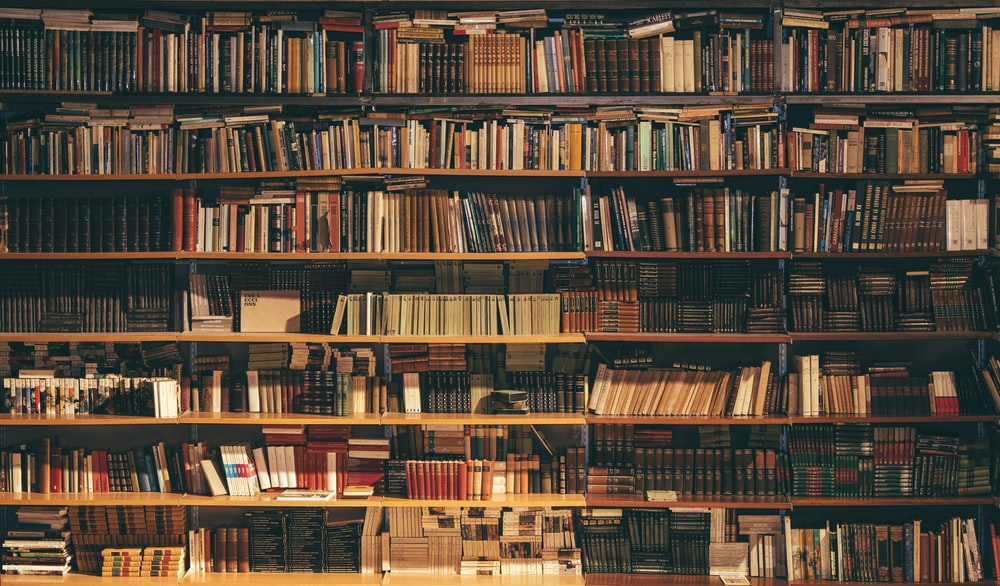

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
global path
from datetime import date
import time
pd.set_option('display.max_columns',None)

In [ ]:
def menu():
  while True:
    print("LMS Version 1.00 By: Computer Concepts: A K Pandey")
    print(" LIBRARY MANAGEMENT SYSTEM")
    print(" P U B L I C L I B R A R Y")
    print(" *****************************")
    print()
    print(" 1- BOOKS")
    print(" 2- MEMBERS")
    print(" 3- TRANSACTION")
    print(" 4- VISUALIZATION")
    print(" 5- ANALYTICS/QUERY")
    print(" 6- E X I T")
    ch=int(input(" Enter your choice [1-6] :"))
    if ch==1:
      books()
    elif ch==2:
      members()
    elif ch==3:
      transaction()
    elif ch==4:
      visualization()
    elif ch==5:
      analytics()
    else:
      print("Thank You")
      break

def books():
  while True:
    print(" B O O K S M E N U")
    print(" **********************")
    print()
    print(" 1- Add New Books")
    print(" 2- Delete old Books")
    print(" 3- Edit detail of the Books")
    print(" 4- B A C K")
    ch=int(input(" Enter your choice [1-4] :"))
    if ch==1:
      add_book()
    elif ch==2:
      del_book()
    elif ch==3:
      edit_book()
    else:
      print("Going back to Main Menu")
      break

def members():
  while True:
    print(" M E M B E R S M E N U")
    print(" *************************")
    print()
    print(" 1- Add Members")
    print(" 2- Delete Members")
    print(" 3- Edit detail of the Memebers")
    print(" 4- B A C K")
    ch=int(input(" Enter your choice [1-4] :"))
    if ch==1:
      add_member()
    elif ch==2:
      del_member()
    elif ch==3:
      edit_member()
    else:
      print("Going back to Main Menu")
      break

def transaction():
  dftrans=pd.read_csv("Transaction.csv")
  print(dftrans)
  while True:
    print(" T R A N S A C T I O N M E N U")
    print(" **********************************")
    print()
    print(" 1- Issue a Book")
    print(" 2- Return a Book")
    print(" 3- B A C K")
    ch=int(input(" Enter your choice [1-3] :"))
    if ch==1:
      issue_book()
    elif ch==2:
      return_book()
    else:
      print("Going back to Main Menu")
      break

def add_book():
  dfbooks=pd.read_csv("Books.csv")
  ans='y'
  bid=0
  while ans=='y' or ans=='Y':
    df=dfbooks.sort_values(by='Book_id')
    df=df.tail(1)
    bid=df.iloc[0,0]+1
    #bid=int(input("Enter Book id :"))
    print("New Book id : ",bid)
    bnm=input("Enter Book Name :")
    auth=input("Enter Author Name :")
    price=float(input("Enter Price :"))
    dt_enter=input("Enter Date of Entry :")
    cpy=int(input("Enter No. of copies:"))
    data=[bid,bnm,auth,price,dt_enter,cpy]
    dfbooks.loc[len(dfbooks)]=data
    dfbooks.to_csv("Books.csv",index=False)
    print("A New Books added Successfully....")
    ans=input("Do you want to add more books?")
    print(dfbooks)

def del_book():
  dfbooks=pd.read_csv("Books.csv")
  ans='y'
  bid=0
  while ans=='y' or ans=='Y':
    bid=int(input("Enter Book id :"))
    if bid in dfbooks['Book_id'].values:
      response=input("Do you really want to remove this book from Library(Y/N)?")
      if response=='y' or response=='Y':
        dfbooks.drop(dfbooks[dfbooks['Book_id']==bid].index,inplace=True)
        print("Book id -",bid,"has been deleted successfully...")
      else:
          print("Book is not found...")
          dfbooks.to_csv("Books.csv",index=False)
          ans=input("Do you want to delete more books?")
          print(ans)

def edit_book():
  dfbooks=pd.read_csv("Books.csv")
  print(dfbooks)
  ans='y'
  bid=0
  while ans=='y' or ans=='Y':
    bid=int(input("Enter Book id :"))
    if bid in dfbooks['Book_id'].values:
      nm=input("Enter the column name to change: ")
      val1=eval(input("Enter it's value: if string in quotes(''): "))
      dfbooks.loc[(dfbooks['Book_id'] == bid),nm]=val1
      print("Book id -",bid,"has been updated successfully...")
      print(dfbooks.loc[dfbooks['Book_id']==bid])
    else:
      print("Book is not found...")
      dfbooks.to_csv("Books.csv",index=False)
      ans=input("Do you want to edit more books?")
      print(ans)

def add_member():
  dfmembers=pd.read_csv("Members.csv")
  ans='y'
  mid=0
  while ans=='y' or ans=='Y':
    df=dfmembers.sort_values(by='Member_id')
    df=df.tail(1)
    mid=df.iloc[0,0]+1
    print("New Member id : ",mid)
    mem_nam=input("Enter Member Name :")
    age=int(input("Enter Age :"))
    phno=int(input("Enter Contact :"))
    addr=input("Enter Address :")
    mship=input("Enter Membership Status (Y/N) :")
    iss_st='N'
    data=[mid,mem_nam,age,phno,addr,mship,iss_st]
    dfmembers.loc[len(dfmembers)]=data
    dfmembers.to_csv("Members.csv",index=False)
    print("A New Member added Successfully....")
    ans=input("Do you want to add more Members?")
    print(dfmembers)

def del_member():
  dfmembers=pd.read_csv("Members.csv")
  ans='y'
  mid=0
  while ans=='y' or ans=='Y':
    mid=int(input("Enter Member id :"))
    if mid in dfmembers['Member_id'].values:
      print(dfmembers.loc[dfmembers.Member_id==mid,['Member_name','Age']])
      ans=input("Do you want to really delete it(Y/N)")
      if ans=='y' or ans=='Y':
        dfmembers.drop(dfmembers[dfmembers['Member_id']==mid].index,inplace= True)
        print("Member id -",mid,"has been deleted successfully...")
      else:
        print("Member is not found...")
        dfmembers.to_csv("Members.csv",index=False)
        ans=input("Do you want to delete more members?")
        print(dfmembers)

def edit_member():
  dfmembers=pd.read_csv("Members.csv")
  print(dfmembers)
  ans='y'
  mid=0
  while ans=='y' or ans=='Y':
    mid=int(input("Enter Member id :"))
    if mid in dfmembers['Member_id'].values:
      nm=input("Enter the column name to change: ")
      val1=eval(input("Enter it's value: if string in quotes(''): "))
      dfmembers.loc[(dfmembers['Member_id'] == mid),nm]=val1
      print("Member id -",mid,"has been updated successfully...")
      print(dfmembers.loc[dfmembers['Member_id']==mid])
    else:
      print("Member is not found...")
      dfmembers.to_csv("Members.csv",index=False)
      ans=input("Do you want to edit more Members?")
      print(dfmembers)

def issue_book():
  dfbooks=pd.read_csv("Books.csv")
  dfmembers=pd.read_csv("Members.csv")
  dftrans=pd.read_csv("Transaction.csv")
  ans='y'
  while ans=='y' or ans=='Y':
    mid=int(input("Enter Member id: "))
    bid=int(input("Enter Book id to be issued: "))
    if mid in dfmembers['Member_id'].values:
      print(dfmembers.loc[dfmembers.Member_id==mid,['Member_name','Age']])
      mship=dfmembers.loc[dfmembers['Member_id'] == mid,'Membership'].values[0]
      istatus=dfmembers.loc[dfmembers['Member_id'] == mid,'Issu_status'].values[0]
      if (mship=='y' or mship=='Y') and (istatus=='n' or istatus=='N'):
        if bid in dfbooks['Book_id'].values:
          print(dfbooks.loc[dfbooks.Book_id==bid,['Bname','Copies']])
          cpy=dfbooks.loc[dfbooks['Book_id'] == bid, 'Copies'].values[0]
          if cpy>0:
            dt_iss=input("Please Enter date of Issue(dd/mm/yyyy): ")
            data=[mid,bid,dt_iss,np.NaN]
            dftrans.loc[len(dftrans)]=data
            dfmembers.loc[dfmembers.Member_id == mid,'Issu_status']='Y'
            dfbooks.loc[dfbooks.Book_id == bid, 'Copies']-=1
            print("Book Issued Successfully...")
          else:
              print("Sorry ! No. of copy is insufficent in the Library..")
        else:
                print("Book is not found...")
      else:
                  print("Sorry! Membership Expired!! or 1-Book Already issued. First return it..")
    else:
                    print("Member is not found...")
                    dftrans.to_csv("Transaction.csv",index=False)
                    dfbooks.to_csv("Books.csv",index=False)
                    dfmembers.to_csv("Members.csv",index=False)
                    ans=input("Do you want to issue more books?")
                    print(dftrans)

def return_book():
  dfbooks=pd.read_csv("Books.csv")
  dfmembers=pd.read_csv("Members.csv")
  dftrans=pd.read_csv("Transaction.csv")
  ans='y'
  while ans=='y' or ans=='Y':
    mid=int(input("Enter Member id: "))
    if mid in dftrans['Member_id'].values:
      dt_is=input("Date of Issue: ")
      dt_rtn=input("Enter Date of Return: ")
      bid=dftrans.loc[(dftrans['Member_id'] == mid) & (dftrans['dt_issue'] == dt_is ), 'Book_id'].values[0]
      cond=(dfmembers.Member_id==mid) & (dfmembers.Issu_status=='Y')
      if cond.any():
        dftrans.loc[(dftrans['Member_id'] == mid) & (dftrans['dt_issue'] == dt_is ), 'dt_return']=dt_rtn
        dfmembers.loc[dfmembers.Member_id == mid, 'Issu_status']='N'
        dfbooks.loc[dfbooks.Book_id == bid, 'Copies']+=1
        # Calculating Fine
        yyr=int(dt_rtn[6:])
        mmr=int(dt_rtn[3:5])
        ddr=int(dt_rtn[:2])
        yyi=int(dt_is[6:])
        mmi=int(dt_is[3:5])
        ddi=int(dt_is[:2])
        d0 = date(yyi, mmi, ddi)
        d1 = date(yyr, mmr, ddr)
        delta = d1 - d0
        n=delta.days
        if n>7:
          fine=(n-7)*10.00
        else:
            fine=0.00
            print("Please Pay Fine Rs.",fine)
            print("Book Returned Successfully...")
      else:
            print("The book is already returned.. Action denied")
    else:
            print("Member is not found...")
            dftrans.to_csv("Transaction.csv",index=False)
            dfbooks.to_csv("Books.csv",index=False)
            dfmembers.to_csv("Members.csv",index=False)
            ans=input("Do you want to Return more books?")
            print(dftrans)

def analytics():
  dfbooks=pd.read_csv("Books.csv")
  dfmembers=pd.read_csv("Members.csv")
  dftrans=pd.read_csv("Transaction.csv")
  while True:
    print(" A N A L Y S I S M E N U")
    print(" ***************************")
    print()
    print(" 1- All Books")
    print(" 2- All Members")
    print(" 3- Search Books (Code wise)")
    print(" 4- Search Books (Name wise)")
    print(" 5- Search Member ( Code wise)")
    print(" 6- Search Member (Name wise)")
    print(" 7- Books issued (Date wise)")
    print(" 8- Back to Main Menu")
    ch=int(input(" Enter your choice [1-8] :"))
    if ch==1:
      print(dfbooks)
    elif ch==2:
      print(dfmembers)
    elif ch==3:
      bcode=int(input("Please Enter Book ID: "))
      print(dfbooks.loc[dfbooks.Book_id==bcode])
    elif ch==4:
      bnm=input("Please Enter Book Name: ")
      length=len(dfbooks)
      for i in range(length):
        if bnm in dfbooks.Bname[i]:
          print(dfbooks.Book_id[i],"--->",dfbooks.Bname[i])
    elif ch==5:
      mid=int(input("Please Enter Member ID: "))
      print(dfmembers.loc[dfmembers.Member_id==mid])
    elif ch==6:
      m_nm=input("Please Enter Member Namee: ")
      length=len(dfmembers)
      for i in range(length):
        if m_nm in dfmembers.Member_name[i]:
          print(dfmembers.Member_id[i],"-- >",dfmembers.Member_name[i],"-->",dfmembers.Contact[i])
    elif ch==7:
      dt_iss=input("Please Enter Date of Issue: ")
      print(dftrans.loc[dftrans.dt_issue==dt_iss])
    else:
      print("Going back to Main Menu")
      break

def visualization():
  dfbooks=pd.read_csv("Books.csv")
  dfmembers=pd.read_csv("Members.csv")
  dftrans=pd.read_csv("Transaction.csv")
  while True:
    print(" V I S U A L I Z A T I O N M E N U")
    print(" *************************************")
    print()
    print(" 1- No. of Copies Balanced in the Library")
    print(" 2- Members Age ( Specific Group)")
    print(" 3- The Books Popularity")
    print(" 4- Back to Main Menu")
    ch=int(input(" Enter your choice [1-4] :"))
    if ch==1:
      typ=input("Graph Type [Line-L,Bar-B]:")
      if typ=='L':
        x1=dfbooks.Bname
        y1=dfbooks.Copies
        n=np.arange(len(dfbooks))
        plt.plot(n, y1,color='m', linestyle='-.',linewidth=2,marker='o')
        plt.xticks(n,x1,rotation=25)
      elif typ=='B':
          dfbooks.plot('Bname','Copies', kind='bar', color='r',rot=20)
          plt.title("Plot: Book Name vs Copies",fontsize=16,color='r')
          plt.xlabel("Book Name-->",fontsize=12,color='m')
          plt.ylabel("No.of Copies-->",fontsize=12,color='m')
          plt.grid()
          plt.show()
    elif ch==2:
          typ=input("Graph Type [Line-L,Bar-B]:")
          if typ=='L':
            x1=dfmembers.Member_name
            y1=dfmembers.Age
            n=np.arange(len(dfmembers))
            plt.plot(n, y1,color='r', linestyle='-.',linewidth=2,marker='^')
            plt.xticks(n,x1,rotation=25)
          elif typ=='B':
              dfmembers.plot('Member_name','Age', kind='bar', color='m',rot=20)
              plt.title("Plot: Member Name vs Age",fontsize=16,color='m')
              plt.xlabel("Member Name-->",fontsize=12,color='b')
              plt.ylabel("Age-->",fontsize=12,color='b')
              plt.grid()
              plt.show()
    elif ch==3:
                bid=list(dftrans.Book_id)
                frequency = {}
                for item in bid:
                  if item in frequency:
                    frequency[item] += 1
                  else:
                      frequency[item] = 1
                      df1=pd.DataFrame({'Book_id':list(frequency.keys()),'Rank':list(frequency.values())})
                      df2=pd.merge(df1,dfbooks,on='Book_id')
                      print(df2)
                      x=df2.Bname
                      y=df2.Rank
                      plt.bar(x,y,color='g',width=0.60)
                      plt.title("Plot: Book no vs Popularity",fontsize=16,color='g')
                      plt.xlabel("Book ID-->",fontsize=12,color='b')
                      plt.ylabel("Reading Frequency-->",fontsize=12,color='b')
                      plt.grid()
                      plt.show()
    elif ch==4:
                        print("Going back to Main Menu.....")
                        break

#***************************************
# Call Main Menu
#***************************************


menu()


#**************************************